In [233]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

Z, A, Liso, T12, P1n, P2n, P3n = np.loadtxt("IAEA-bdn-noiso.txt", usecols=(1, 2, 3, 16, 18, 20, 22), unpack=True, skiprows=1)
df = pd.read_csv("iaea_bdne.dat",sep='\t')

#with pd.option_context('display.max_rows', None, 'display.max_columns', None): display(df)

In [234]:
#Z, A, Qbeta, Qbeta-n, Qbeta-2n, Qbeta-3n, T12
df_X = df.iloc[:,[False,True,True,False,False,False,False,False,True,False,True,False,True,False,True,False,True]]
df_X.columns = ["Z","A","Qb","Qbn","Qb2n","Qb3n","T12"]
df_X['Qb'] *= 0.001
df_X['Qbn'] *= 0.001
df_X['Qb2n'] *= 0.001
df_X['Qb3n'] *= 0.001

#Pn, P2n, P3n
df_Y = df.iloc[:,[False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False]]
df_Y.columns = ["P1n","P2n","P3n"]

#Is_T12_0 = df_X["T12"]==0
#Is_P1n_0 = df_Y["P1n"]==0

Is_T12_non0 = np.zeros(df_X.shape[0],dtype=bool)
Is_P1n_non0 = np.zeros(df_X.shape[0],dtype=bool)
for i in range(df_X.shape[0]):
    if df_X.iloc[i,6] == 0:
        Is_T12_non0[i] = False
    elif df_X.iloc[i,6] != 0:
        Is_T12_non0[i] = True
    if df_Y.iloc[i,0] == 0:
        Is_P1n_non0[i] = False
    elif df_Y.iloc[i,0] != 0:
        Is_P1n_non0[i] = True
Is_liso_0 = df.iloc[:,3]==0
df_X["1/T12"]=1/df_X["T12"]
df_X_short = df_X[(Is_P1n_non0&Is_T12_non0&Is_liso_0)]
df_Y_short = df_Y[(Is_P1n_non0&Is_T12_non0&Is_liso_0)]
df_X_long = df_X[(Is_T12_non0&Is_liso_0)]
df_Y_long = df_Y[(Is_T12_non0&Is_liso_0)]

/Applications/python3_6/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/python3_6/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Applications/python3_6/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [235]:
P1n = df_Y_short["P1n"].values
X_input = df_X_short.values

In [236]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(8, input_dim=8, activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [237]:
X = np.copy(X_input)
Y = np.reshape(P1n,(287,1))

model.fit(X, Y, epochs=1500)

Epoch 1/1500
287/287 [==============================] - 1s 2ms/step - loss: 1060.0111 - mean_squared_error: 1060.0111
Epoch 2/1500
287/287 [==============================] - 0s 54us/step - loss: 1056.5833 - mean_squared_error: 1056.5833
Epoch 3/1500
287/287 [==============================] - 0s 96us/step - loss: 1052.9785 - mean_squared_error: 1052.9785
Epoch 4/1500
287/287 [==============================] - 0s 197us/step - loss: 1049.2394 - mean_squared_error: 1049.2394
Epoch 5/1500
287/287 [==============================] - 0s 157us/step - loss: 1045.5437 - mean_squared_error: 1045.5437
Epoch 6/1500
287/287 [==============================] - 0s 357us/step - loss: 1041.9849 - mean_squared_error: 1041.9849
Epoch 7/1500
287/287 [==============================] - 0s 128us/step - loss: 1038.2121 - mean_squared_error: 1038.2121
Epoch 8/1500
287/287 [==============================] - 0s 204us/step - loss: 1034.1348 - mean_squared_error: 1034.1348
Epoch 9/1500
287/287 [======================

287/287 [==============================] - 0s 164us/step - loss: 507.8821 - mean_squared_error: 507.8821
Epoch 70/1500
287/287 [==============================] - 0s 62us/step - loss: 504.4791 - mean_squared_error: 504.4791
Epoch 71/1500
287/287 [==============================] - 0s 61us/step - loss: 501.3466 - mean_squared_error: 501.3466
Epoch 72/1500
287/287 [==============================] - 0s 118us/step - loss: 498.0148 - mean_squared_error: 498.0148
Epoch 73/1500
287/287 [==============================] - 0s 262us/step - loss: 494.8562 - mean_squared_error: 494.8562
Epoch 74/1500
287/287 [==============================] - 0s 376us/step - loss: 492.3807 - mean_squared_error: 492.3807
Epoch 75/1500
287/287 [==============================] - 0s 470us/step - loss: 489.2361 - mean_squared_error: 489.2361
Epoch 76/1500
287/287 [==============================] - 0s 181us/step - loss: 486.5338 - mean_squared_error: 486.5338
Epoch 77/1500
287/287 [==============================] - 0s 171u

287/287 [==============================] - 0s 504us/step - loss: 329.0738 - mean_squared_error: 329.0738
Epoch 138/1500
287/287 [==============================] - 0s 353us/step - loss: 327.1648 - mean_squared_error: 327.1648
Epoch 139/1500
287/287 [==============================] - 0s 260us/step - loss: 326.0390 - mean_squared_error: 326.0390
Epoch 140/1500
287/287 [==============================] - 0s 530us/step - loss: 323.3495 - mean_squared_error: 323.3495
Epoch 141/1500
287/287 [==============================] - 0s 318us/step - loss: 321.3652 - mean_squared_error: 321.3652
Epoch 142/1500
287/287 [==============================] - 0s 273us/step - loss: 320.6032 - mean_squared_error: 320.6032
Epoch 143/1500
287/287 [==============================] - 0s 112us/step - loss: 318.9082 - mean_squared_error: 318.9082
Epoch 144/1500
287/287 [==============================] - 0s 105us/step - loss: 316.5843 - mean_squared_error: 316.5843
Epoch 145/1500
287/287 [==============================]

287/287 [==============================] - 0s 170us/step - loss: 246.9892 - mean_squared_error: 246.9892
Epoch 206/1500
287/287 [==============================] - 0s 92us/step - loss: 248.4960 - mean_squared_error: 248.4960
Epoch 207/1500
287/287 [==============================] - 0s 73us/step - loss: 247.1136 - mean_squared_error: 247.1136
Epoch 208/1500
287/287 [==============================] - 0s 88us/step - loss: 246.5007 - mean_squared_error: 246.5007
Epoch 209/1500
287/287 [==============================] - 0s 167us/step - loss: 243.2506 - mean_squared_error: 243.2506
Epoch 210/1500
287/287 [==============================] - 0s 62us/step - loss: 245.0475 - mean_squared_error: 245.0475
Epoch 211/1500
287/287 [==============================] - 0s 68us/step - loss: 245.2618 - mean_squared_error: 245.2618
Epoch 212/1500
287/287 [==============================] - 0s 128us/step - loss: 245.5278 - mean_squared_error: 245.5278
Epoch 213/1500
287/287 [==============================] - 0s

287/287 [==============================] - 0s 161us/step - loss: 212.8154 - mean_squared_error: 212.8154
Epoch 274/1500
287/287 [==============================] - 0s 152us/step - loss: 212.1362 - mean_squared_error: 212.1362
Epoch 275/1500
287/287 [==============================] - 0s 117us/step - loss: 212.4145 - mean_squared_error: 212.4145
Epoch 276/1500
287/287 [==============================] - 0s 178us/step - loss: 214.6560 - mean_squared_error: 214.6560
Epoch 277/1500
287/287 [==============================] - 0s 170us/step - loss: 211.5104 - mean_squared_error: 211.5104
Epoch 278/1500
287/287 [==============================] - 0s 153us/step - loss: 211.6246 - mean_squared_error: 211.6246
Epoch 279/1500
287/287 [==============================] - 0s 157us/step - loss: 211.1452 - mean_squared_error: 211.1452
Epoch 280/1500
287/287 [==============================] - 0s 211us/step - loss: 211.5531 - mean_squared_error: 211.5531
Epoch 281/1500
287/287 [==============================]

287/287 [==============================] - 0s 491us/step - loss: 198.0531 - mean_squared_error: 198.0531
Epoch 341/1500
287/287 [==============================] - 0s 347us/step - loss: 197.4391 - mean_squared_error: 197.4391
Epoch 342/1500
287/287 [==============================] - 0s 693us/step - loss: 196.8844 - mean_squared_error: 196.8844
Epoch 343/1500
287/287 [==============================] - 0s 488us/step - loss: 197.1656 - mean_squared_error: 197.1656
Epoch 344/1500
287/287 [==============================] - 0s 340us/step - loss: 196.9700 - mean_squared_error: 196.9700
Epoch 345/1500
287/287 [==============================] - 0s 595us/step - loss: 196.7543 - mean_squared_error: 196.7543
Epoch 346/1500
287/287 [==============================] - 0s 311us/step - loss: 196.5327 - mean_squared_error: 196.5327
Epoch 347/1500
287/287 [==============================] - 0s 410us/step - loss: 197.1136 - mean_squared_error: 197.1136
Epoch 348/1500
287/287 [==============================]

Epoch 408/1500
287/287 [==============================] - 0s 97us/step - loss: 189.8819 - mean_squared_error: 189.8819
Epoch 409/1500
287/287 [==============================] - 0s 91us/step - loss: 189.5136 - mean_squared_error: 189.5136
Epoch 410/1500
287/287 [==============================] - 0s 226us/step - loss: 191.4980 - mean_squared_error: 191.4980
Epoch 411/1500
287/287 [==============================] - 0s 141us/step - loss: 190.0191 - mean_squared_error: 190.0191
Epoch 412/1500
287/287 [==============================] - 0s 179us/step - loss: 190.5339 - mean_squared_error: 190.5339
Epoch 413/1500
287/287 [==============================] - 0s 124us/step - loss: 190.0939 - mean_squared_error: 190.0939
Epoch 414/1500
287/287 [==============================] - 0s 195us/step - loss: 189.2377 - mean_squared_error: 189.2377
Epoch 415/1500
287/287 [==============================] - 0s 193us/step - loss: 189.8935 - mean_squared_error: 189.8935
Epoch 416/1500
287/287 [==================

287/287 [==============================] - 0s 121us/step - loss: 188.5532 - mean_squared_error: 188.5532
Epoch 477/1500
287/287 [==============================] - 0s 139us/step - loss: 183.6420 - mean_squared_error: 183.6420
Epoch 478/1500
287/287 [==============================] - 0s 213us/step - loss: 186.5031 - mean_squared_error: 186.5031
Epoch 479/1500
287/287 [==============================] - 0s 463us/step - loss: 184.4656 - mean_squared_error: 184.4656
Epoch 480/1500
287/287 [==============================] - 0s 326us/step - loss: 184.8841 - mean_squared_error: 184.8841
Epoch 481/1500
287/287 [==============================] - 0s 402us/step - loss: 185.0340 - mean_squared_error: 185.0340
Epoch 482/1500
287/287 [==============================] - 0s 499us/step - loss: 184.5706 - mean_squared_error: 184.5706
Epoch 483/1500
287/287 [==============================] - 0s 406us/step - loss: 184.7472 - mean_squared_error: 184.7472
Epoch 484/1500
287/287 [==============================]

287/287 [==============================] - 0s 294us/step - loss: 180.8371 - mean_squared_error: 180.8371
Epoch 545/1500
287/287 [==============================] - 0s 109us/step - loss: 182.1738 - mean_squared_error: 182.1738
Epoch 546/1500
287/287 [==============================] - 0s 245us/step - loss: 182.4240 - mean_squared_error: 182.4240
Epoch 547/1500
287/287 [==============================] - 0s 244us/step - loss: 182.0229 - mean_squared_error: 182.0229
Epoch 548/1500
287/287 [==============================] - 0s 124us/step - loss: 181.2508 - mean_squared_error: 181.2508
Epoch 549/1500
287/287 [==============================] - 0s 186us/step - loss: 181.9364 - mean_squared_error: 181.9364
Epoch 550/1500
287/287 [==============================] - 0s 144us/step - loss: 180.8783 - mean_squared_error: 180.8783
Epoch 551/1500
287/287 [==============================] - 0s 236us/step - loss: 181.2493 - mean_squared_error: 181.2493
Epoch 552/1500
287/287 [==============================]

Epoch 612/1500
287/287 [==============================] - 0s 169us/step - loss: 178.6927 - mean_squared_error: 178.6927
Epoch 613/1500
287/287 [==============================] - 0s 98us/step - loss: 178.7244 - mean_squared_error: 178.7244
Epoch 614/1500
287/287 [==============================] - 0s 131us/step - loss: 178.1953 - mean_squared_error: 178.1953
Epoch 615/1500
287/287 [==============================] - 0s 151us/step - loss: 179.2711 - mean_squared_error: 179.2711
Epoch 616/1500
287/287 [==============================] - 0s 93us/step - loss: 179.9582 - mean_squared_error: 179.9582
Epoch 617/1500
287/287 [==============================] - 0s 140us/step - loss: 180.4438 - mean_squared_error: 180.4438
Epoch 618/1500
287/287 [==============================] - 0s 177us/step - loss: 179.5418 - mean_squared_error: 179.5418
Epoch 619/1500
287/287 [==============================] - 0s 83us/step - loss: 180.1281 - mean_squared_error: 180.1281
Epoch 620/1500
287/287 [===================

287/287 [==============================] - 0s 166us/step - loss: 176.0378 - mean_squared_error: 176.0378
Epoch 681/1500
287/287 [==============================] - 0s 127us/step - loss: 176.2046 - mean_squared_error: 176.2046
Epoch 682/1500
287/287 [==============================] - 0s 124us/step - loss: 176.3468 - mean_squared_error: 176.3468
Epoch 683/1500
287/287 [==============================] - 0s 140us/step - loss: 176.6628 - mean_squared_error: 176.6628
Epoch 684/1500
287/287 [==============================] - 0s 175us/step - loss: 176.2341 - mean_squared_error: 176.2341
Epoch 685/1500
287/287 [==============================] - 0s 155us/step - loss: 176.3852 - mean_squared_error: 176.3852
Epoch 686/1500
287/287 [==============================] - 0s 260us/step - loss: 175.7262 - mean_squared_error: 175.7262
Epoch 687/1500
287/287 [==============================] - 0s 154us/step - loss: 176.8436 - mean_squared_error: 176.8436
Epoch 688/1500
287/287 [==============================]

287/287 [==============================] - 0s 175us/step - loss: 173.3956 - mean_squared_error: 173.3956
Epoch 749/1500
287/287 [==============================] - 0s 143us/step - loss: 173.8015 - mean_squared_error: 173.8015
Epoch 750/1500
287/287 [==============================] - 0s 153us/step - loss: 173.7174 - mean_squared_error: 173.7174
Epoch 751/1500
287/287 [==============================] - 0s 151us/step - loss: 173.9758 - mean_squared_error: 173.9758
Epoch 752/1500
287/287 [==============================] - 0s 95us/step - loss: 173.2547 - mean_squared_error: 173.2547
Epoch 753/1500
287/287 [==============================] - 0s 204us/step - loss: 173.7167 - mean_squared_error: 173.7167
Epoch 754/1500
287/287 [==============================] - 0s 145us/step - loss: 172.9272 - mean_squared_error: 172.9272
Epoch 755/1500
287/287 [==============================] - 0s 155us/step - loss: 175.3511 - mean_squared_error: 175.3511
Epoch 756/1500
287/287 [==============================] 

287/287 [==============================] - 0s 120us/step - loss: 170.4470 - mean_squared_error: 170.4470
Epoch 817/1500
287/287 [==============================] - 0s 115us/step - loss: 170.4672 - mean_squared_error: 170.4672
Epoch 818/1500
287/287 [==============================] - 0s 111us/step - loss: 171.1685 - mean_squared_error: 171.1685
Epoch 819/1500
287/287 [==============================] - 0s 168us/step - loss: 171.2984 - mean_squared_error: 171.2984
Epoch 820/1500
287/287 [==============================] - 0s 126us/step - loss: 170.7623 - mean_squared_error: 170.7623
Epoch 821/1500
287/287 [==============================] - 0s 115us/step - loss: 170.6285 - mean_squared_error: 170.6285
Epoch 822/1500
287/287 [==============================] - 0s 97us/step - loss: 170.0545 - mean_squared_error: 170.0545
Epoch 823/1500
287/287 [==============================] - 0s 232us/step - loss: 170.3784 - mean_squared_error: 170.3784
Epoch 824/1500
287/287 [==============================] 

287/287 [==============================] - 0s 448us/step - loss: 168.1560 - mean_squared_error: 168.1560
Epoch 885/1500
287/287 [==============================] - 0s 366us/step - loss: 167.5257 - mean_squared_error: 167.5257
Epoch 886/1500
287/287 [==============================] - 0s 395us/step - loss: 170.1073 - mean_squared_error: 170.1073
Epoch 887/1500
287/287 [==============================] - 0s 784us/step - loss: 166.4768 - mean_squared_error: 166.4768
Epoch 888/1500
287/287 [==============================] - 0s 293us/step - loss: 171.0669 - mean_squared_error: 171.0669
Epoch 889/1500
287/287 [==============================] - 0s 364us/step - loss: 168.6894 - mean_squared_error: 168.6894
Epoch 890/1500
287/287 [==============================] - 0s 382us/step - loss: 167.7739 - mean_squared_error: 167.7739
Epoch 891/1500
287/287 [==============================] - 0s 157us/step - loss: 168.8142 - mean_squared_error: 168.8142
Epoch 892/1500
287/287 [==============================]

287/287 [==============================] - 0s 75us/step - loss: 164.6541 - mean_squared_error: 164.6541
Epoch 953/1500
287/287 [==============================] - 0s 194us/step - loss: 165.8556 - mean_squared_error: 165.8556
Epoch 954/1500
287/287 [==============================] - 0s 280us/step - loss: 165.2120 - mean_squared_error: 165.2120
Epoch 955/1500
287/287 [==============================] - 0s 201us/step - loss: 164.6400 - mean_squared_error: 164.6400
Epoch 956/1500
287/287 [==============================] - 0s 144us/step - loss: 164.3881 - mean_squared_error: 164.3881
Epoch 957/1500
287/287 [==============================] - 0s 195us/step - loss: 165.2800 - mean_squared_error: 165.2800
Epoch 958/1500
287/287 [==============================] - 0s 131us/step - loss: 164.3735 - mean_squared_error: 164.3735
Epoch 959/1500
287/287 [==============================] - 0s 107us/step - loss: 164.2647 - mean_squared_error: 164.2647
Epoch 960/1500
287/287 [==============================] 

287/287 [==============================] - 0s 159us/step - loss: 162.6631 - mean_squared_error: 162.6631
Epoch 1020/1500
287/287 [==============================] - 0s 128us/step - loss: 162.8538 - mean_squared_error: 162.8538
Epoch 1021/1500
287/287 [==============================] - 0s 185us/step - loss: 163.6422 - mean_squared_error: 163.6422
Epoch 1022/1500
287/287 [==============================] - 0s 133us/step - loss: 167.2042 - mean_squared_error: 167.2042
Epoch 1023/1500
287/287 [==============================] - 0s 89us/step - loss: 161.9506 - mean_squared_error: 161.9506
Epoch 1024/1500
287/287 [==============================] - 0s 129us/step - loss: 163.3195 - mean_squared_error: 163.3195
Epoch 1025/1500
287/287 [==============================] - 0s 137us/step - loss: 162.6809 - mean_squared_error: 162.6809
Epoch 1026/1500
287/287 [==============================] - 0s 148us/step - loss: 163.3671 - mean_squared_error: 163.3671
Epoch 1027/1500
287/287 [========================

287/287 [==============================] - 0s 557us/step - loss: 160.7018 - mean_squared_error: 160.7018
Epoch 1087/1500
287/287 [==============================] - 0s 486us/step - loss: 159.8923 - mean_squared_error: 159.8923
Epoch 1088/1500
287/287 [==============================] - 0s 219us/step - loss: 162.5075 - mean_squared_error: 162.5075
Epoch 1089/1500
287/287 [==============================] - 0s 558us/step - loss: 161.1119 - mean_squared_error: 161.1119
Epoch 1090/1500
287/287 [==============================] - 0s 182us/step - loss: 159.8750 - mean_squared_error: 159.8750
Epoch 1091/1500
287/287 [==============================] - 0s 61us/step - loss: 160.2397 - mean_squared_error: 160.2397
Epoch 1092/1500
287/287 [==============================] - 0s 63us/step - loss: 159.9648 - mean_squared_error: 159.9648
Epoch 1093/1500
287/287 [==============================] - 0s 65us/step - loss: 159.9440 - mean_squared_error: 159.9440
Epoch 1094/1500
287/287 [==========================

287/287 [==============================] - 0s 85us/step - loss: 158.6470 - mean_squared_error: 158.6470
Epoch 1154/1500
287/287 [==============================] - 0s 59us/step - loss: 158.0073 - mean_squared_error: 158.0073
Epoch 1155/1500
287/287 [==============================] - 0s 53us/step - loss: 158.5431 - mean_squared_error: 158.5431
Epoch 1156/1500
287/287 [==============================] - 0s 56us/step - loss: 158.1704 - mean_squared_error: 158.1704
Epoch 1157/1500
287/287 [==============================] - 0s 103us/step - loss: 160.1794 - mean_squared_error: 160.1794
Epoch 1158/1500
287/287 [==============================] - 0s 138us/step - loss: 158.0923 - mean_squared_error: 158.0923
Epoch 1159/1500
287/287 [==============================] - 0s 58us/step - loss: 158.3533 - mean_squared_error: 158.3533
Epoch 1160/1500
287/287 [==============================] - 0s 72us/step - loss: 157.6289 - mean_squared_error: 157.6289
Epoch 1161/1500
287/287 [=============================

Epoch 1221/1500
287/287 [==============================] - 0s 135us/step - loss: 157.5566 - mean_squared_error: 157.5566
Epoch 1222/1500
287/287 [==============================] - 0s 113us/step - loss: 155.8518 - mean_squared_error: 155.8518
Epoch 1223/1500
287/287 [==============================] - 0s 131us/step - loss: 156.1381 - mean_squared_error: 156.1381
Epoch 1224/1500
287/287 [==============================] - 0s 141us/step - loss: 156.0888 - mean_squared_error: 156.0888
Epoch 1225/1500
287/287 [==============================] - 0s 226us/step - loss: 155.4820 - mean_squared_error: 155.4820
Epoch 1226/1500
287/287 [==============================] - 0s 133us/step - loss: 156.0096 - mean_squared_error: 156.0096
Epoch 1227/1500
287/287 [==============================] - 0s 197us/step - loss: 156.8448 - mean_squared_error: 156.8448
Epoch 1228/1500
287/287 [==============================] - 0s 154us/step - loss: 155.9296 - mean_squared_error: 155.9296
Epoch 1229/1500
287/287 [=======

287/287 [==============================] - 0s 64us/step - loss: 155.3496 - mean_squared_error: 155.3496
Epoch 1289/1500
287/287 [==============================] - 0s 115us/step - loss: 154.3256 - mean_squared_error: 154.3256
Epoch 1290/1500
287/287 [==============================] - 0s 158us/step - loss: 154.6340 - mean_squared_error: 154.6340
Epoch 1291/1500
287/287 [==============================] - 0s 60us/step - loss: 153.9694 - mean_squared_error: 153.9694
Epoch 1292/1500
287/287 [==============================] - 0s 105us/step - loss: 155.8674 - mean_squared_error: 155.8674
Epoch 1293/1500
287/287 [==============================] - 0s 110us/step - loss: 156.3558 - mean_squared_error: 156.3558
Epoch 1294/1500
287/287 [==============================] - 0s 92us/step - loss: 153.7739 - mean_squared_error: 153.7739
Epoch 1295/1500
287/287 [==============================] - 0s 61us/step - loss: 154.4359 - mean_squared_error: 154.4359
Epoch 1296/1500
287/287 [===========================

287/287 [==============================] - 0s 112us/step - loss: 155.3663 - mean_squared_error: 155.3663
Epoch 1356/1500
287/287 [==============================] - 0s 134us/step - loss: 153.7012 - mean_squared_error: 153.7012
Epoch 1357/1500
287/287 [==============================] - 0s 200us/step - loss: 153.3797 - mean_squared_error: 153.3797
Epoch 1358/1500
287/287 [==============================] - 0s 194us/step - loss: 153.7091 - mean_squared_error: 153.7091
Epoch 1359/1500
287/287 [==============================] - 0s 345us/step - loss: 153.2517 - mean_squared_error: 153.2517
Epoch 1360/1500
287/287 [==============================] - 0s 447us/step - loss: 152.2358 - mean_squared_error: 152.2358
Epoch 1361/1500
287/287 [==============================] - 0s 936us/step - loss: 153.8567 - mean_squared_error: 153.8567
Epoch 1362/1500
287/287 [==============================] - 0s 228us/step - loss: 154.2784 - mean_squared_error: 154.2784
Epoch 1363/1500
287/287 [=======================

287/287 [==============================] - 0s 384us/step - loss: 151.2757 - mean_squared_error: 151.2757
Epoch 1423/1500
287/287 [==============================] - ETA: 0s - loss: 137.2186 - mean_squared_error: 137.21 - 0s 186us/step - loss: 152.4857 - mean_squared_error: 152.4857
Epoch 1424/1500
287/287 [==============================] - 0s 75us/step - loss: 151.4065 - mean_squared_error: 151.4065
Epoch 1425/1500
287/287 [==============================] - 0s 113us/step - loss: 152.8853 - mean_squared_error: 152.8853
Epoch 1426/1500
287/287 [==============================] - 0s 168us/step - loss: 152.9590 - mean_squared_error: 152.9590
Epoch 1427/1500
287/287 [==============================] - 0s 231us/step - loss: 152.3216 - mean_squared_error: 152.3216
Epoch 1428/1500
287/287 [==============================] - 0s 134us/step - loss: 151.5373 - mean_squared_error: 151.5373
Epoch 1429/1500
287/287 [==============================] - 0s 678us/step - loss: 151.9631 - mean_squared_error: 15

Epoch 1489/1500
287/287 [==============================] - 0s 380us/step - loss: 151.7312 - mean_squared_error: 151.7312
Epoch 1490/1500
287/287 [==============================] - 0s 550us/step - loss: 149.8359 - mean_squared_error: 149.8359
Epoch 1491/1500
287/287 [==============================] - 0s 288us/step - loss: 150.3322 - mean_squared_error: 150.3322
Epoch 1492/1500
287/287 [==============================] - 0s 341us/step - loss: 152.6651 - mean_squared_error: 152.6651
Epoch 1493/1500
287/287 [==============================] - 0s 557us/step - loss: 156.9927 - mean_squared_error: 156.9927
Epoch 1494/1500
287/287 [==============================] - 0s 204us/step - loss: 153.9413 - mean_squared_error: 153.9413
Epoch 1495/1500
287/287 [==============================] - 0s 290us/step - loss: 151.3083 - mean_squared_error: 151.3083
Epoch 1496/1500
287/287 [==============================] - 0s 284us/step - loss: 151.0382 - mean_squared_error: 151.0382
Epoch 1497/1500
287/287 [=======

In [238]:
X_short = np.copy(X_input)
X_long = df_X_long.values 
Y = np.reshape(P1n,(287,1))

In [239]:
y_pred_long = model.predict(X_long)


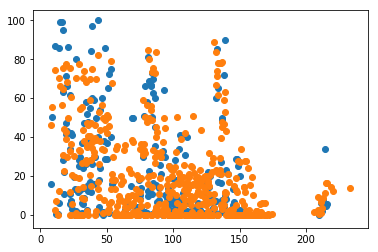

In [240]:
plt.scatter(df_X_short["A"].values,Y)
plt.scatter(df_X_long["A"].values,y_pred_long)

In [241]:
df_grid = pd.read_csv("nuclear_wallet_card.dat",sep='\t')
grid_Z = df_grid.iloc[:,2].values
grid_N = df_grid.iloc[:,3].values
grid = []
for z,n in zip(grid_Z,grid_N):
    grid.append([n,z])

#for i in range(20):
#    for j in range(20):
#        grid.append([i+1,j+1])
#df_grid
grid = np.unique(grid, axis=0)
len(grid)

3386

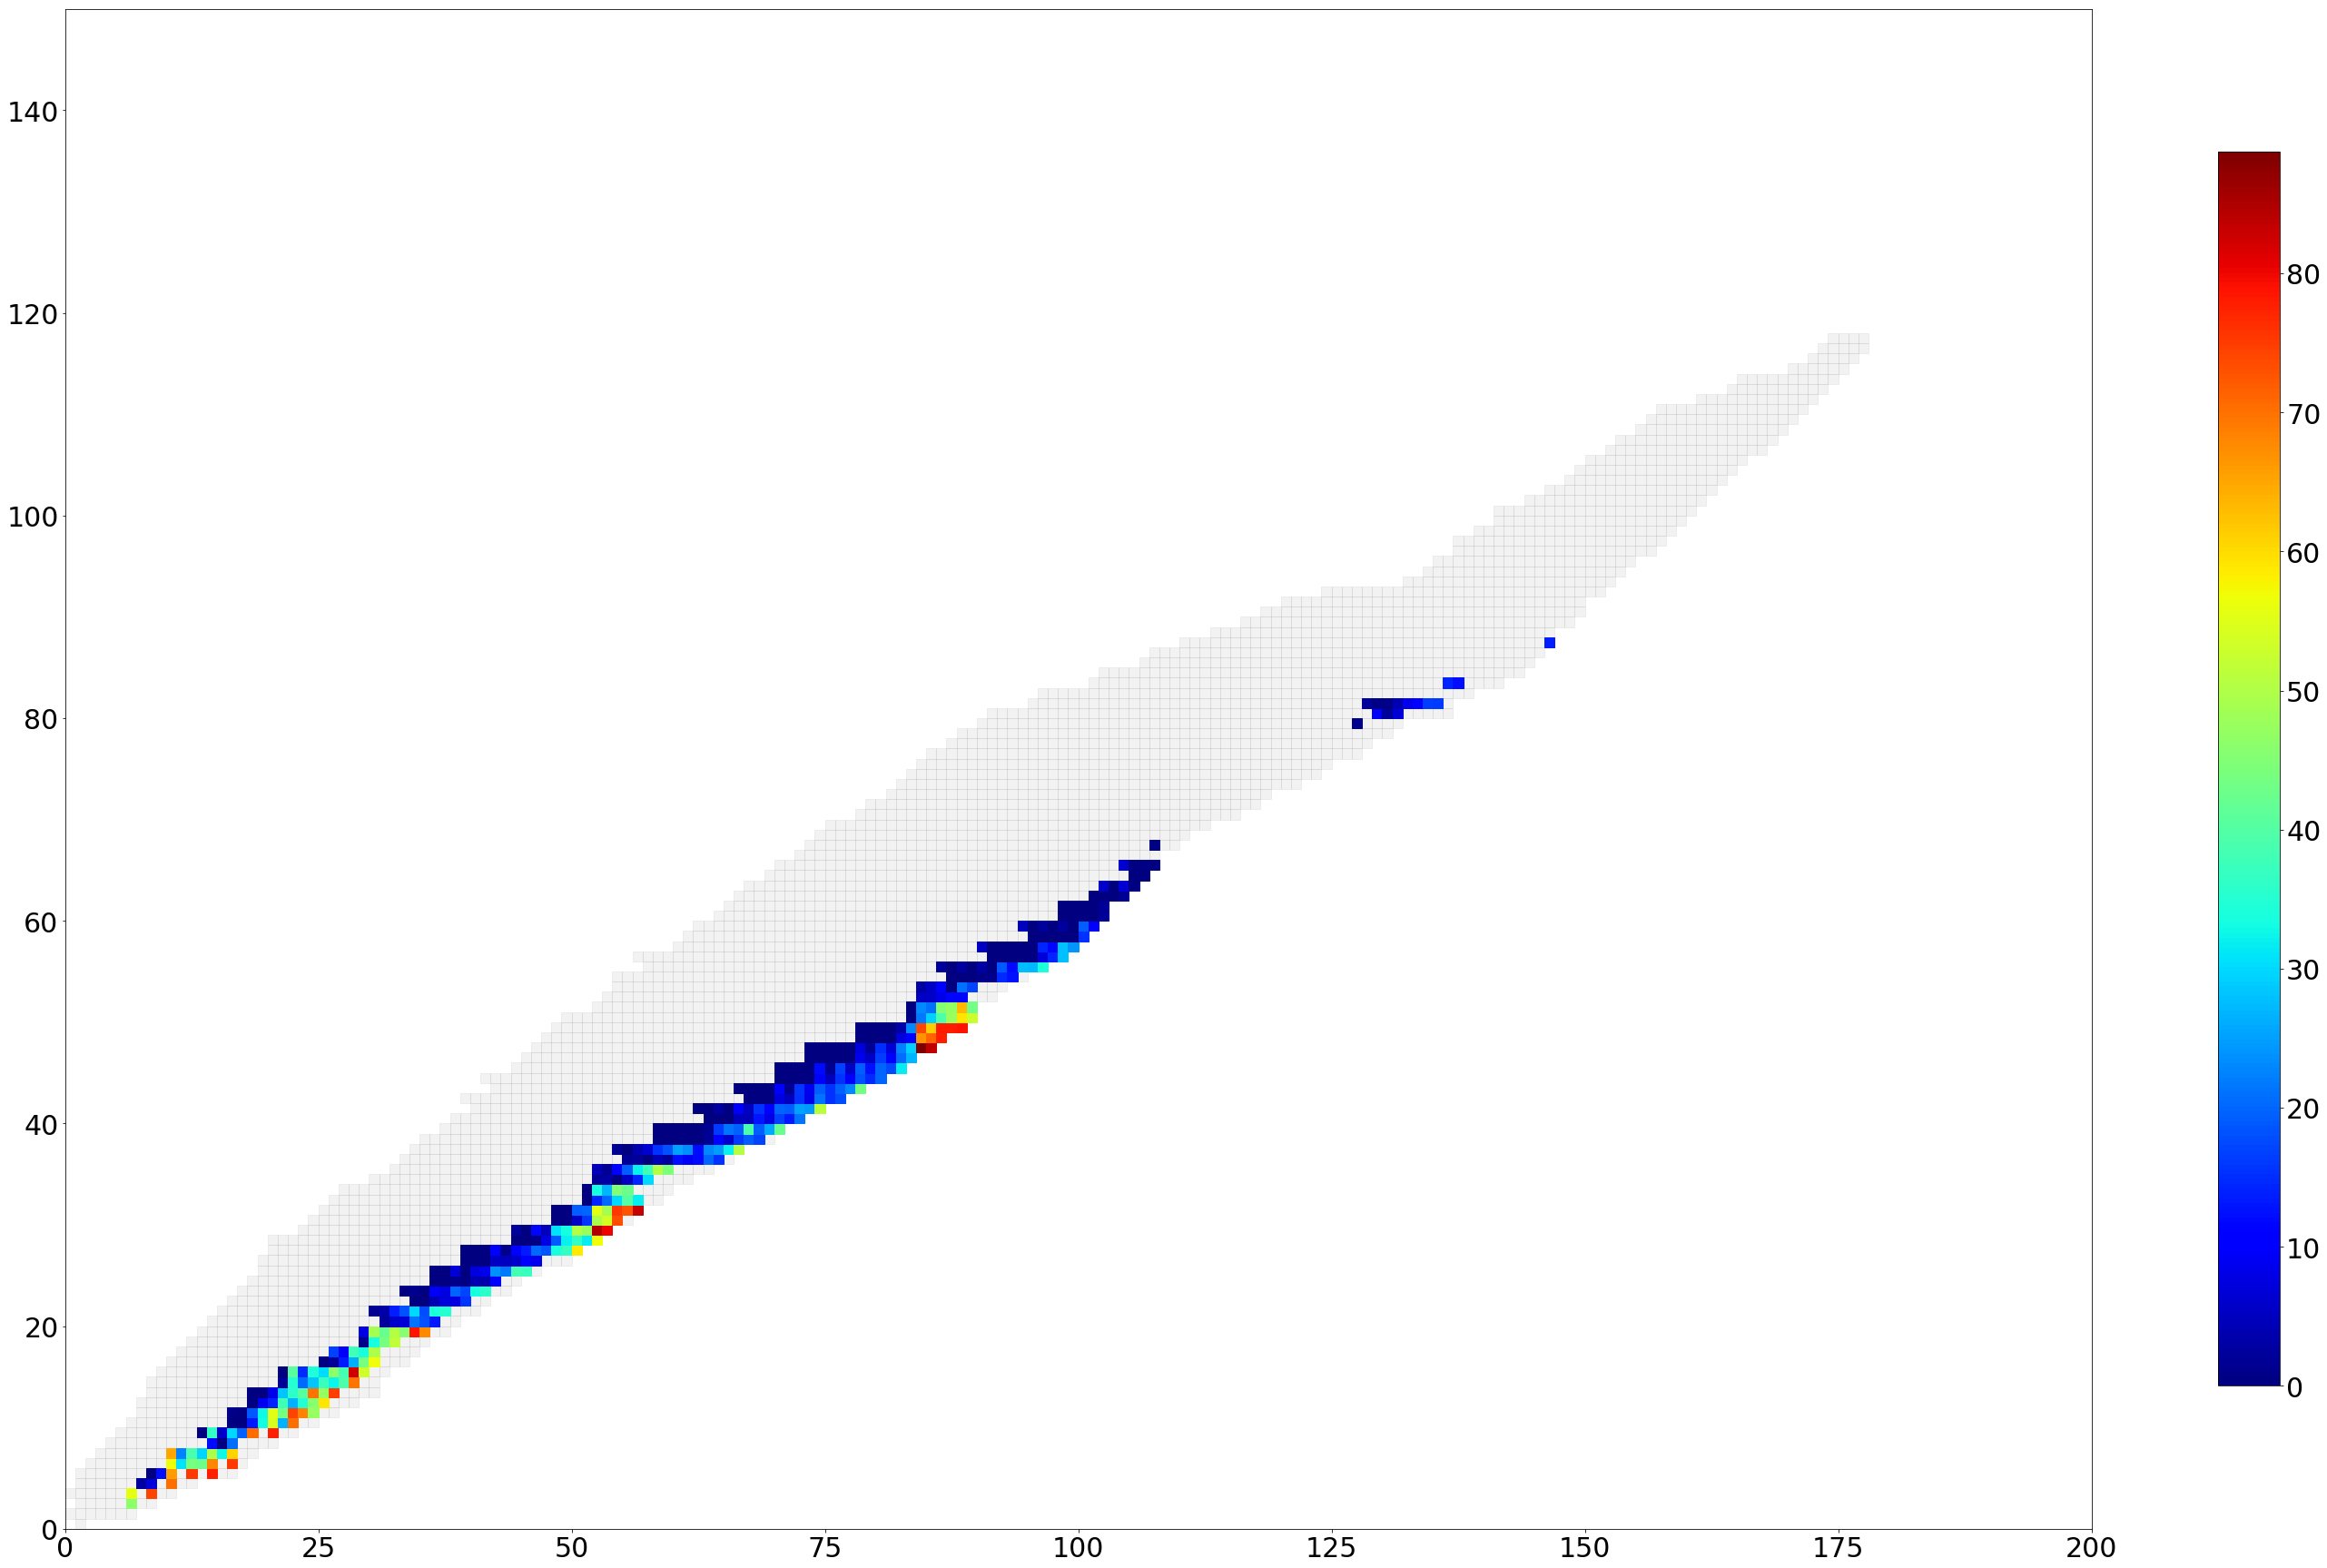

In [273]:
mpl.rcParams.update({'font.size': 30}) 

fig, ax = plt.subplots(1,figsize=(50,50))
ax = plt.gca()
for i in range(len(grid)):
    rect=Rectangle(grid[i],1,1,alpha=0.1,color='grey',edgecolor=None,clip_on=True,linewidth=None)
    ax.add_patch(rect)
    
x_pred_grid = df_X_long[['Z','A']].values
normal = plt.Normalize(y_pred_long.min(), y_pred_long.max())
colors = plt.cm.jet(normal(y_pred_long))    
colors = colors.reshape(508,4)

for x,y,c in zip(x_pred_grid[:,0],x_pred_grid[:,1],colors):
    rect = plt.Rectangle((y-x,x),1,1,edgecolor=None,color=c)
    ax.add_patch(rect)     
    
plt.xlim((0,200))
plt.ylim((0,150))
ax.set_aspect(aspect=1)
cax, _ = cbar.make_axes(ax,shrink=0.5) 
cb2 = cbar.ColorbarBase(cax, cmap=plt.cm.jet,norm=normal)   


#ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

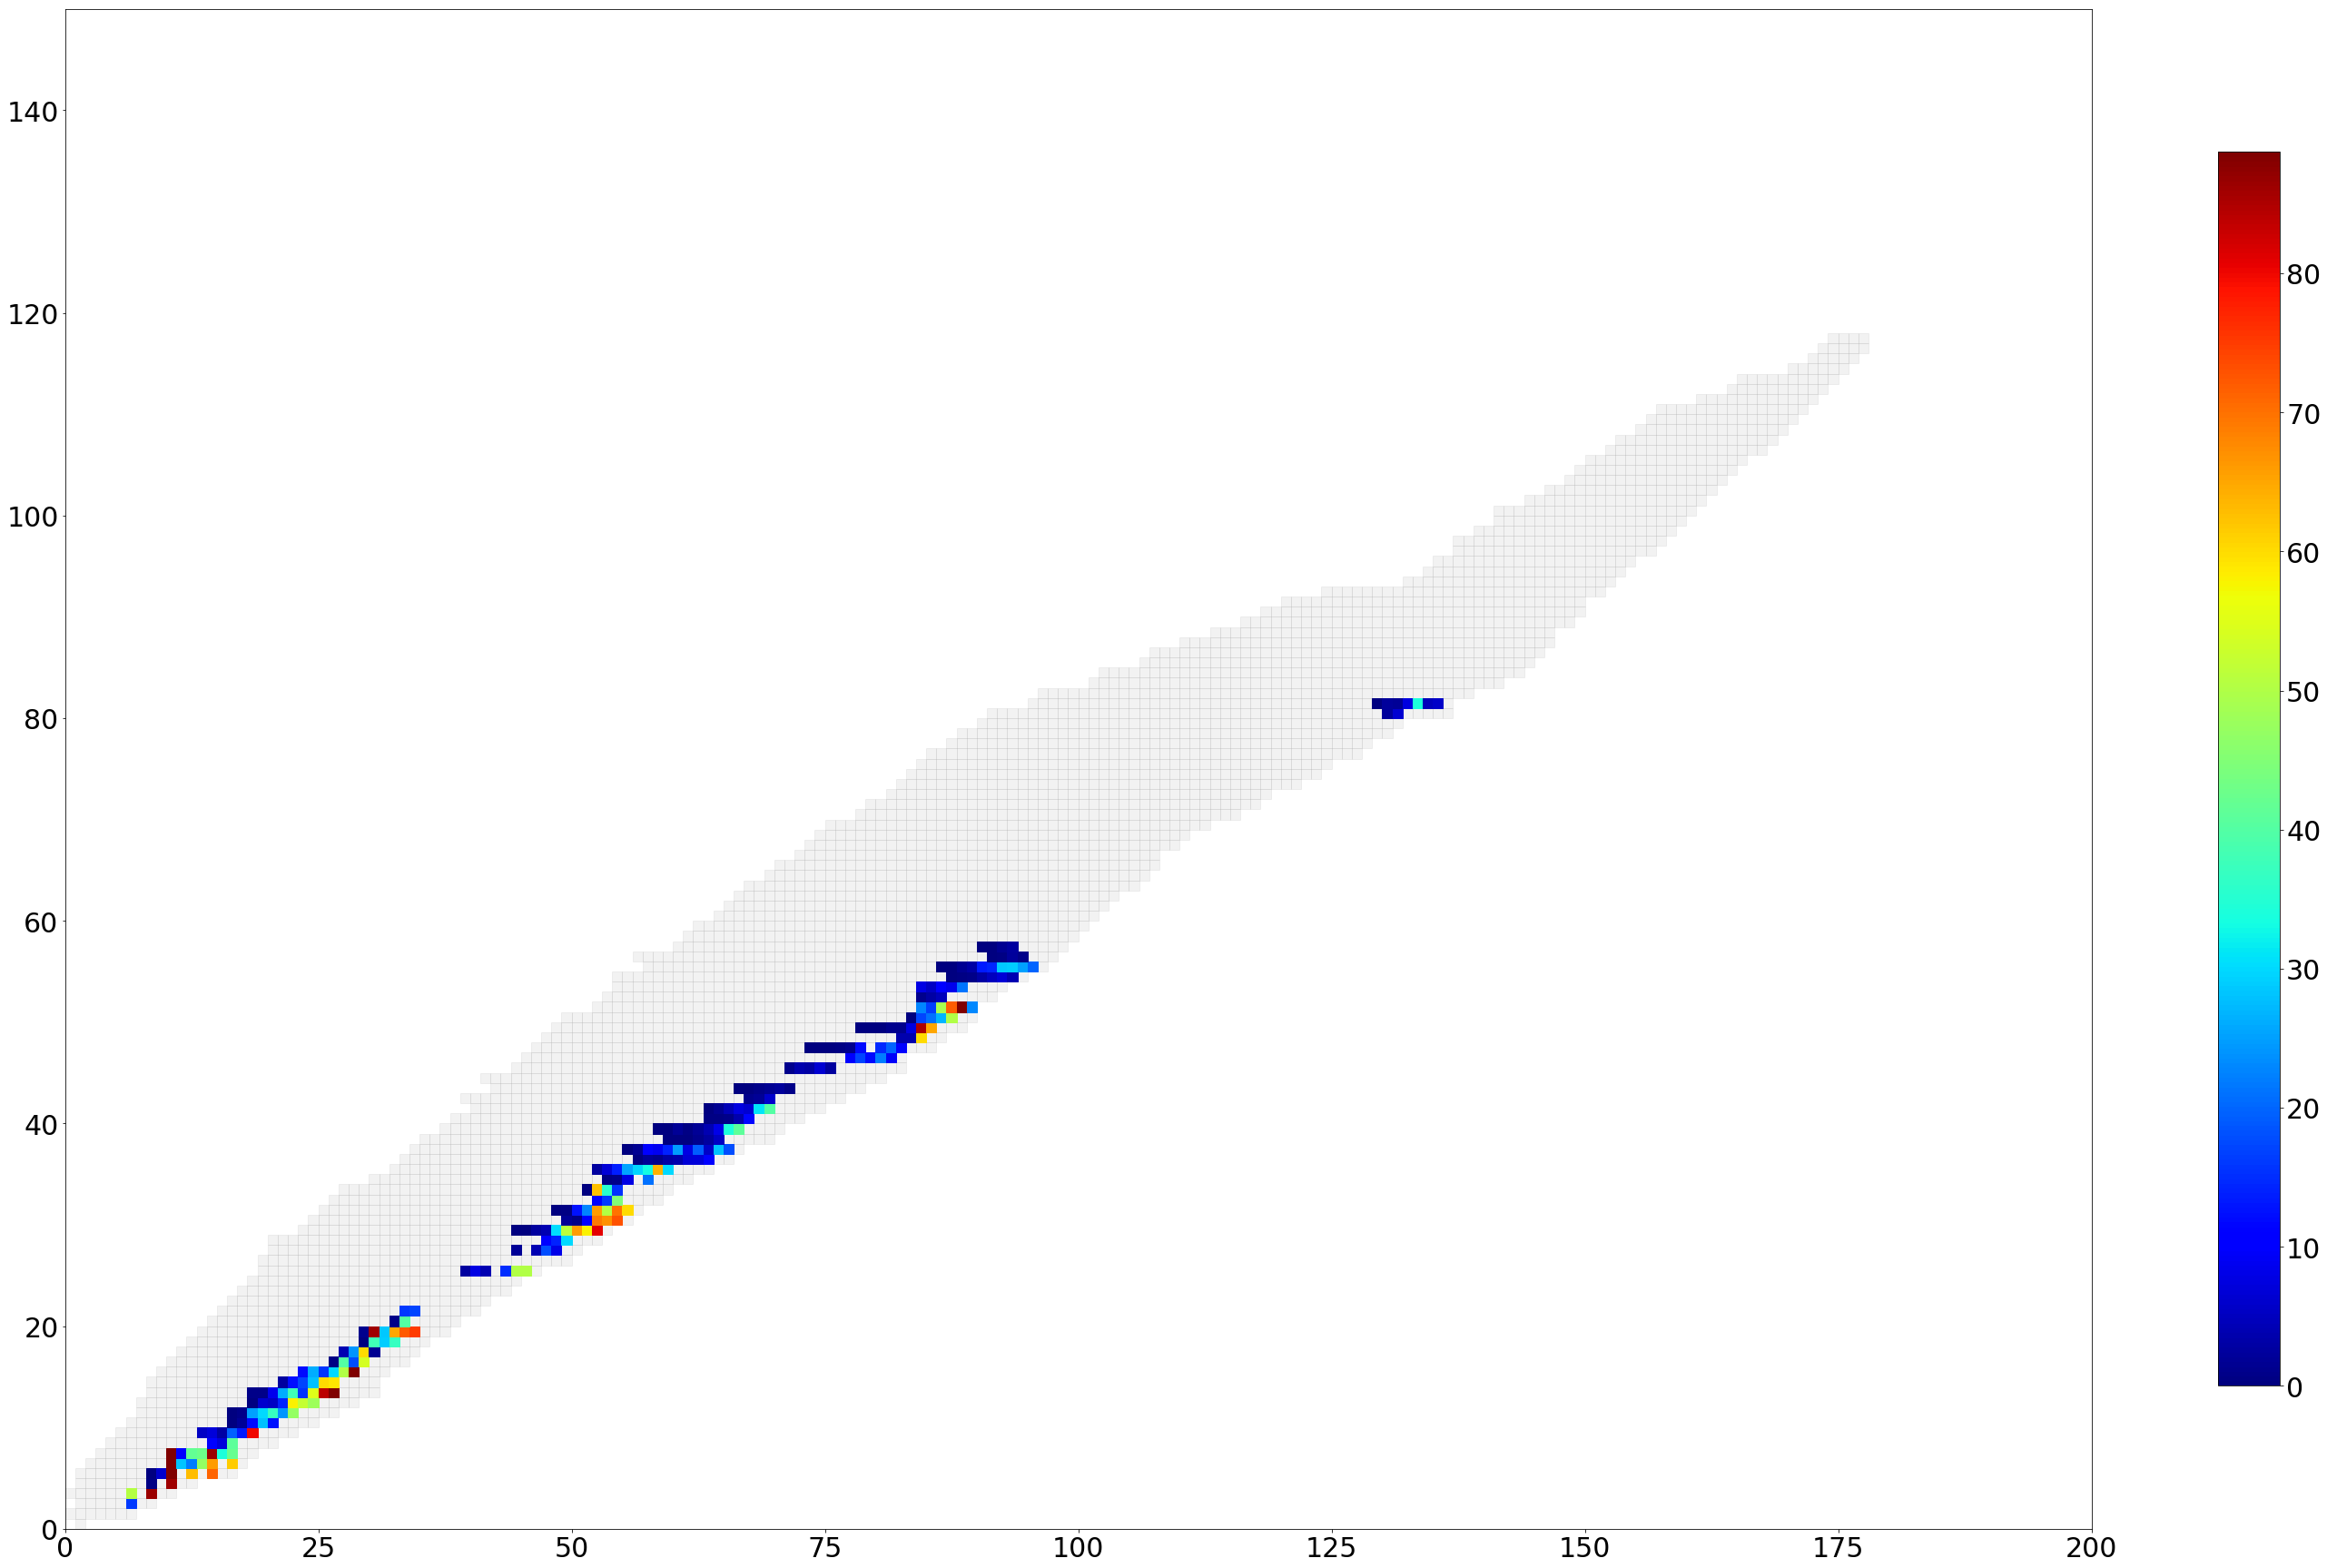

In [274]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,figsize=(50,50))
ax = plt.gca()

x_pred_grid = df_X_short[['Z','A']].values
normal = plt.Normalize(y_pred_long.min(), y_pred_long.max())
colors = plt.cm.jet(normal(Y))    
colors = colors.reshape(287,4)

for i in range(len(grid)):
    rect=Rectangle(grid[i],1,1,alpha=0.1,color='grey',edgecolor=None,clip_on=True,linewidth=None)
    ax.add_patch(rect)

for x,y,c in zip(x_pred_grid[:,0],x_pred_grid[:,1],colors):
    rect = plt.Rectangle((y-x,x),1,1,edgecolor=None,color=c)
    ax.add_patch(rect)    

plt.xlim((0,200))
plt.ylim((0,150))
ax.set_aspect(aspect=1)
cax, _ = cbar.make_axes(ax,shrink=0.5) 
cb2 = cbar.ColorbarBase(cax, cmap=plt.cm.jet,norm=normal)       

plt.show()